## Which are the most combinient states to build distribution centers throughout the USA?
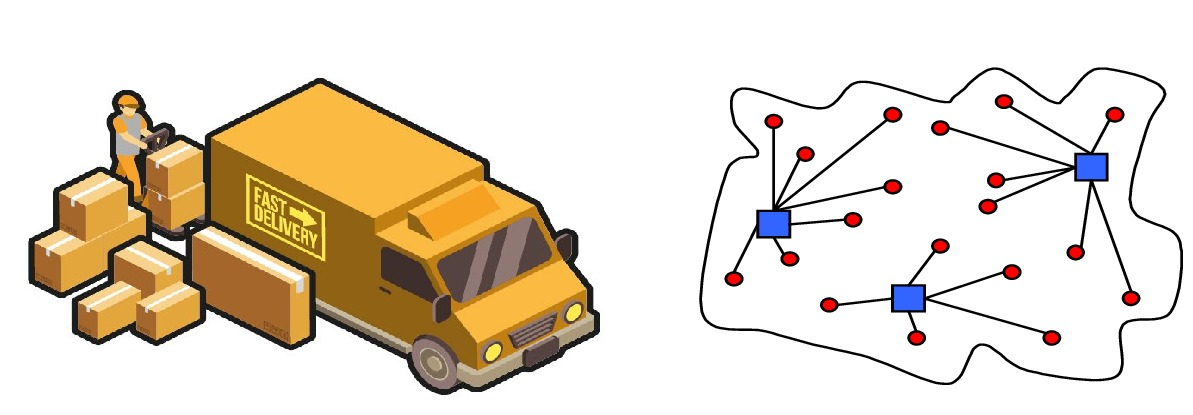

### Problem Statement
Suppose we have $m$ demanda nodes and $n$ potential supply nodes to build distribution centers, the aim is to find the minimum number of places to build them in such a way we cover all the customers' demand while minimizing cost of production and transportation at once. Each customer (demand node) has a fixed demand $d_j$ and each distribution center (supply node) has a fixed capacity $K_i$ of production and delivery.

### Variables and Parameters
Let's $I=\{1,2,...,n\}$ set of indices on the supply nodes y $J=\{1,2,...,m\}$ set of indices on the demand nodes.

- $f_i$ is the cost of building a distribution center at the i'th state
- $d_j$ is the j'th customer's demand
- $K_i$ is the capacity of delivery of the i'th distribution center
- $x_{ij}$ is the amount shipped from the i'th  dist. center to the j'th customer
- $c_{ij}$ is the delivert cost of shipping x amount of product from the i'th center to the j'th customer
- $y_i$ is a binary variable which indicates if a dist. center is built at the i'th state.

### Mathematical Model
**Minimizing**

$$
z = \sum_{i=1}^n f_iy_i + \sum_{i=1}^n \sum_{j=1}^m c_{ij} x_{ij}
$$

**Subject to**:

1. For each customer must fulfill, the amoung shipped from all distribution centers must be hihher or equal to the customer's demand.

$$
\sum_{i=1}^n x_{ij}\geq d_{j}
$$

2. Each distribution center has a delivery capacity which cannot be exceeded.

$$
\sum_{j=1}^m x_{ij}\leq K_{i} y_i
$$

3. Where the amount $x_{ij}$ shipped must positive o null strictly.

$$
x_{ij}\geq 0\ \ \ \ y\ \ \ \ y_i\in \{0,1\}
$$

### Input Data 

The following chart provides all the data needed to solve this problem:

Node  $j$ | Atlanta | Boston | Chicago | Denver | Omaha | Portland| | |
:------:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
**Node** $i$ | |   |   |   | | | $f_i$ (thousands)| $K_i$ (thousands)|
Baltimore | \$1.256 | \$1.001 | \$1.290 | \$2.353 | \$1.787 | \$3.353  | \$7.650 | 18.000 |
Cheyenne | \$2.023 | \$2.617 | \$1.626 | \$0.693 | \$1.123  | \$1.692 | \$3.500 | 24.000 | 
Salt Lake City | \$2.439 | \$3.044 | \$2.060 | \$1.015 | \$1.558  | \$1.326 | \$5.000 | 27.000 |
Memphis | \$0.969 | \$1.910 | \$1.145 | \$1.617 | \$1.205  | \$2.756| \$4.100 | 22.000 | 
Wichita | \$1.491 | \$2.252 | \$1.274 | \$1.092 | \$0.881  | \$2.237 | 2.200 | 31.000 |
$d_{ij}$ (thousands) | 10.000 | 8.000 | 14.000 | 6.000 | 7.000 | 11.000 | | | 


In [1]:
# Importing libraries for data dealing
import pandas as pd
import numpy as np

# Importing libraries for geospatial analysis
import folium
from geopy.geocoders import Nominatim
from geopy import distance
geolocator = Nominatim(user_agent='prueba')

In [2]:
# Input Data
supply_nodes = ['Baltimore','Cheyenne','Salt Lake City','Memphis','Wichita']
demand_nodes = ['Atlanta','Boston','Chicago','Denver','Omaha','Portland']
demand = [10, 8, 14, 6, 7, 11] # in tousand units
fixed_costs = [7650, 3500, 5000, 4100, 2200] # in thousands of $
capacity = [18, 24, 27, 22, 31] # in thousand units

In [3]:
# We use GeoPy to get the coordinates of both potential distribution centers and demand nodes
sn_latitude = [] 
sn_longitude = []
dn_latitude = [] 
dn_longitude = []

print('The supply nodes coordinates are:')
print()
for i in supply_nodes:
  location = geolocator.geocode(i)
  sn_latitude.append(location.latitude)
  sn_longitude.append(location.longitude)
  print(i,'=',location.latitude, location.longitude)

print()
print('The demand nodes coordinates are:')
print()
for i in demand_nodes:
  location = geolocator.geocode(i)
  dn_latitude.append(location.latitude)
  dn_longitude.append(location.longitude)
  print(i,'=',location.latitude, location.longitude)

The supply nodes coordinates are:

Baltimore = 39.2908816 -76.610759
Cheyenne = 41.139981 -104.820246
Salt Lake City = 40.7596198 -111.8867975
Memphis = 35.1335022 -89.9668758
Wichita = 37.6922361 -97.3375448

The demand nodes coordinates are:

Atlanta = 33.7489924 -84.3902644
Boston = 42.3602534 -71.0582912
Chicago = 41.8755616 -87.6244212
Denver = 39.7392364 -104.9848623
Omaha = 41.2587459 -95.9383758
Portland = 45.5202471 -122.6741949


In [39]:
# Let's create the map in folium:
map = folium.Map(location=[37.6922361, -97.3375448], zoom_start=4.45)

# Let's draw the demand nodes on the map
for i in range(len(demand_nodes)):
  folium.Circle(location=[dn_latitude[i],dn_longitude[i]], color='black', fill_color='green',
                weight=2, radius=50000, fill_opacity=0.5, 
                tooltip={'Location':demand_nodes[i],
                         'Demand (K)':demand[i]}).add_to(map)

# Graficamos los nodos de avastecimiento 
for i in range(len(supply_nodes)):
  folium.Circle(location=[sn_latitude[i],sn_longitude[i]], color='black', fill_color='red',
                weight=2, radius=50000, fill_opacity=0.5, 
                tooltip={'Location':supply_nodes[i],'Capacity (K)':capacity[i]}).add_to(map)

#map

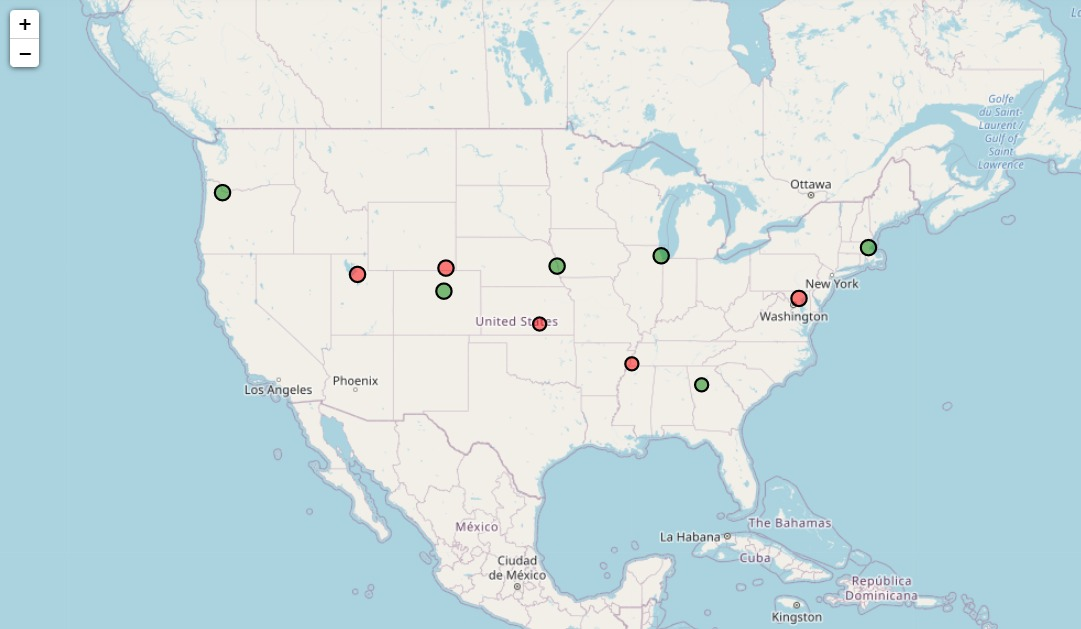

Now let's obtain the distances between the i'th distribution center and the j'th customer. To do so we'll use the function "distance" from the "geopy" library, which calculate distances between points considering the Earth as an elipsoid according to the WGS-84 reference system.

In [5]:
# Calculating distances by pairs
d = {(supply_nodes[i],demand_nodes[j]):distance.distance([sn_latitude[i],sn_longitude[i]],(dn_latitude[j],dn_longitude[j])).km
    for i in range(len(supply_nodes))
    for j in range(len(demand_nodes)) }

# Printing the distances
d

{('Baltimore', 'Atlanta'): 928.6841492574893,
 ('Baltimore', 'Boston'): 579.0729867961753,
 ('Baltimore', 'Chicago'): 974.7987348037739,
 ('Baltimore', 'Denver'): 2430.286679677378,
 ('Baltimore', 'Omaha'): 1654.7821741831362,
 ('Baltimore', 'Portland'): 3801.007191681749,
 ('Cheyenne', 'Atlanta'): 1978.8497987924268,
 ('Cheyenne', 'Boston'): 2792.897703726446,
 ('Cheyenne', 'Chicago'): 1435.530002336281,
 ('Cheyenne', 'Denver'): 156.168720375668,
 ('Cheyenne', 'Omaha'): 744.8138943685251,
 ('Cheyenne', 'Portland'): 1523.740519205342,
 ('Salt Lake City', 'Atlanta'): 2548.13972924579,
 ('Salt Lake City', 'Boston'): 3377.641160577805,
 ('Salt Lake City', 'Chicago'): 2028.4948680128518,
 ('Salt Lake City', 'Denver'): 597.8937483234744,
 ('Salt Lake City', 'Omaha'): 1340.8970120653648,
 ('Salt Lake City', 'Portland'): 1023.3522949739614,
 ('Memphis', 'Atlanta'): 534.9415408897681,
 ('Memphis', 'Boston'): 1823.59590964857,
 ('Memphis', 'Chicago'): 775.7103215160222,
 ('Memphis', 'Denver'): 

Once we have the distances we can calculate the delivery costs by the following expressión:

$$
C_{ij}\ =\ 0.00072981582\cdot d_{ij}\ + \ 0.57907298 
$$

In [6]:
# Applying the formula
C = {(supply_nodes[i],demand_nodes[j]):
     distance.distance([sn_latitude[i],sn_longitude[i]],(dn_latitude[j],dn_longitude[j])).km * 0.00072981582 + 0.57907298
    for i in range(len(supply_nodes))
    for j in range(len(demand_nodes)) }

# Printing costs between the i'th center and the j'th customer
C

{('Baltimore', 'Atlanta'): 1.2568413639113567,
 ('Baltimore', 'Boston'): 1.0016896066984997,
 ('Baltimore', 'Chicago'): 1.2904965179757788,
 ('Baltimore', 'Denver'): 2.3527346459638228,
 ('Baltimore', 'Omaha'): 1.7867591893728485,
 ('Baltimore', 'Portland'): 3.3531081604231128,
 ('Cheyenne', 'Atlanta'): 2.0232688685625297,
 ('Cheyenne', 'Boston'): 2.617373907821233,
 ('Cheyenne', 'Chicago'): 1.6267454857896548,
 ('Cheyenne', 'Denver'): 0.6930473827193188,
 ('Cheyenne', 'Omaha'): 1.1226499430659584,
 ('Cheyenne', 'Portland'): 1.6911229164910724,
 ('Salt Lake City', 'Atlanta'): 2.438745665974094,
 ('Salt Lake City', 'Boston'): 3.044128933272842,
 ('Salt Lake City', 'Chicago'): 2.059500625464591,
 ('Salt Lake City', 'Denver'): 1.0154252962055699,
 ('Salt Lake City', 'Omaha'): 1.557680832396034,
 ('Salt Lake City', 'Portland'): 1.3259316743053033,
 ('Memphis', 'Atlanta'): 0.9694817793165296,
 ('Memphis', 'Boston'): 1.9099621241488167,
 ('Memphis', 'Chicago'): 1.1451986443796793,
 ('Memphis

Note the results obteined previously are aproximately the same as those displayed on the table.

### Preparing our data to use in the Pyomo environment
Before defining our model in the Pyomo environment we need to reformat our data to be accepted for Pyomo. For instance, for Pyomo to be able of accepting input data this data must be defining as a Python dictionary, thus, we will transform all of our input-data lists into dictionaries.

In [7]:
# Number of elements of the I & J sets
n = len(supply_nodes) ; m = len(demand_nodes)

# Reformating the data:
Fixed_costs = {i:fixed_costs[i] for i in range(n)}
Demand = {j:demand[j] for j in range(m)}
K = {i:capacity[i] for i in range(n)}

C1 = []
for k,v in C.items():
    C1.append(v)
C2 = np.reshape(C1, (n,m))

In [19]:
K

{0: 18, 1: 24, 2: 27, 3: 22, 4: 31}

Now our data has the right format we're ready to solve this problem, to do so we must follow the next steps:

1. Import the pyomo environment and create the model
2. Set up the sets I and J
3. Initialize parameters and variables
4. Define the objective function in the Pyomo sintax
5. Define constraints
6. Call the solver to solve the problem
7. Present results


In [20]:
# 1. First of all we import the Pyomo environment and create the model
from pyomo.environ import *
model = ConcreteModel()

In [21]:
# 2. We set up the sets I and J
model.I = RangeSet(0,n-1)
model.J = RangeSet(0,m-1)

In [22]:
# 3. Initializing parameters in the Pyomo sintax
model.d = Param(model.J, initialize = Demand)
model.f = Param(model.I, initialize = Fixed_costs)
model.K = Param(model.I, initialize = K)

def Cost_rule(model,i,j):
    return C2[i,j]
model.c = Param(model.I, model.J, initialize = Cost_rule)

In [23]:
# 3. Initializing variables 
model.x = Var(model.I, model.J, domain=NonNegativeReals)
model.y = Var(model.I, within=Binary)

In [25]:
# 4. Defining the objective function
def rule_OF(model):
    z = sum(model.f[i]*model.y[i] for i in model.I) + sum(model.x[i,j]*model.c[i,j] for i in model.I for j in model.J)
    return z

model.OF = Objective(rule=rule_OF, sense=minimize)

In [26]:
# 5. Stating constraints

# Constraint 1: fultill the demand of all of the custumers
def C1_rule(model,j):
    return sum(model.x[i,j] for i in model.I) >= model.d[j]

model.Const1 = Constraint(model.J, rule = C1_rule )

# Constraint 2: not exceed the DC capacity
def C2_rule(model,i):
    return sum(model.x[i,j] for j in model.J) == model.K[i]*model.y[i]

model.Const2 = Constraint( model.I, rule = C2_rule )

In [27]:
# 6. We call the solver
solver = SolverFactory('glpk')
resultados = solver.solve(model)

In [29]:
# 7. Displaying results

# En esta lista se guardaran los indices de los centros abiertos
opened = []

print('The distribution centers to be opened are:')
for i in model.I:
    if value(model.y[i]) == 1:
        print('i =',i)
        opened.append(i)
        
print('The distribution centers that won\'t be opened are:')
for i in model.I:
    if value(model.y[i]) != 1:
        print('i =',i)

The distribution centers to be opened are:
i = 2
i = 4
The distribution centers that won't be opened are:
i = 0
i = 1
i = 3


In [40]:
# Let's print on the map the chosen centers

map = folium.Map(location=[37.6922361, -97.3375448], zoom_start=4.45)

# Let's draw the demand nodes on the map
for i in range(len(demand_nodes)):
  folium.Circle(location=[dn_latitude[i],dn_longitude[i]], color='black', fill_color='green',
                weight=2, radius=50000, fill_opacity=0.5, 
                tooltip={'Location':demand_nodes[i],
                         'Demand (K)':demand[i]}).add_to(map)

# Graficamos los nodos de avastecimiento 
for i in range(len(supply_nodes)):
    if i in opened:
      folium.Circle(location=[sn_latitude[i],sn_longitude[i]], color='black', fill_color='red',
                    weight=2, radius=50000, fill_opacity=0.5, 
                    tooltip={'Location':supply_nodes[i],'Capacity (K)':capacity[i]}).add_to(map)

#map

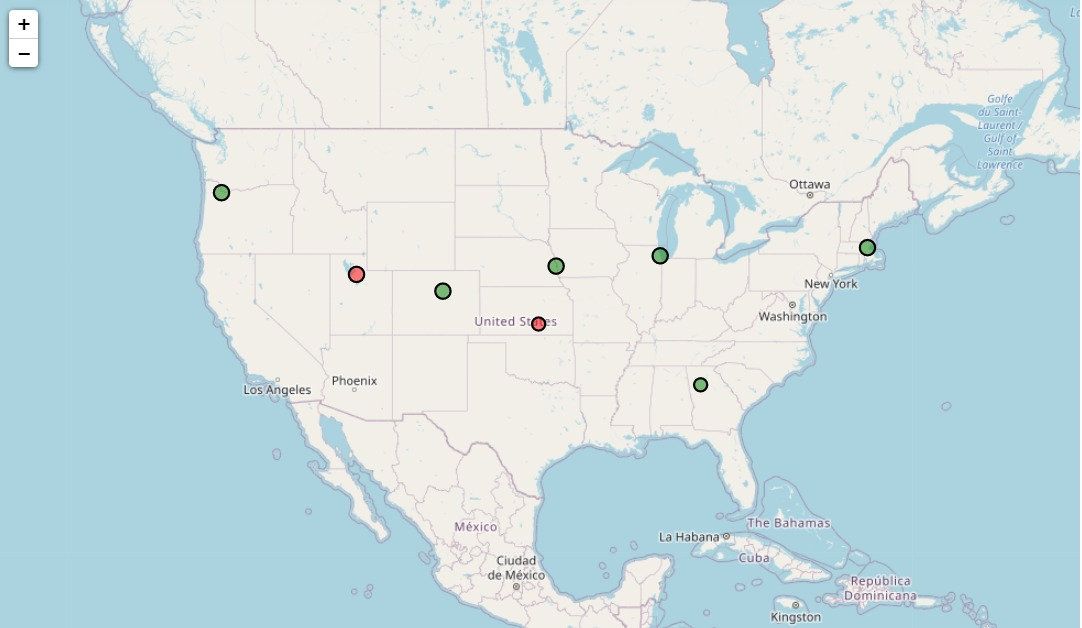

In [31]:
# shipped amount of products:
for i in opened:
    for j in model.J:
        print('From center',i,' to customer',j,'-> Xij =',value(model.x[i,j]))

From center 2  to customer 0 -> Xij = 0.0
From center 2  to customer 1 -> Xij = 0.0
From center 2  to customer 2 -> Xij = 1.0
From center 2  to customer 3 -> Xij = 8.0
From center 2  to customer 4 -> Xij = 7.0
From center 2  to customer 5 -> Xij = 11.0
From center 4  to customer 0 -> Xij = 10.0
From center 4  to customer 1 -> Xij = 8.0
From center 4  to customer 2 -> Xij = 13.0
From center 4  to customer 3 -> Xij = 0.0
From center 4  to customer 4 -> Xij = 0.0
From center 4  to customer 5 -> Xij = 0.0


In [38]:
# Costo total de construcción
print('El costo total es: $',round(value(model.OF),3)/1000,' millions dlls')

El costo total es: $ 7.285157  millions dlls
